Marjum Pass, Oct 14-15 night. On the ground, ~30m baseline EW.

Inputs:

0: bicone + 2 amps + 90 MHz LPF

1: discone + 2 amps + 90 MHz LPF

2, 3: tentpole + FEM + PAM

4, 5: vivaldi + FEM + PAM

SNAP: C000091 (10.10.10.13)

In [1]:
from datetime import datetime
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from eigsep_corr import io
%matplotlib inline

In [3]:
DATA_DIR = "/home/christian/Documents/research/eigsep/eigsep_corr/eigsep_corr/data/"
# subset of files with us definitely gone
files = sorted(glob(os.path.join(DATA_DIR, "2023101[4-5]*")), key=os.path.getctime)[265:-45]

In [4]:
h = io.read_file(files[0])[0]
PAIRS = h["pairs"]
N_ACC = len(h["acc_cnt"])
ACC_BINS = h["acc_bins"]
NCHAN = h["nchan"]

In [6]:
autos = [p for p in PAIRS if len(p) == 1]
crosses = [p for p in PAIRS if len(p) == 2]
print(autos, crosses)
dauto = {}
dcross = {}
for pair in autos:
    d = np.empty((len(files), N_ACC, ACC_BINS, NCHAN))
    for i, f in enumerate(files):
        d[i] = io.read_file(f)[1][pair][..., 0]
    dauto[pair] = d
for pair in crosses:
    d = np.empty((len(files), N_ACC, ACC_BINS, NCHAN, 2))
    for i, f in enumerate(files):
        d[i] = io.read_file(f)[1][pair]
    dcross[pair] = d

['0', '1', '2', '3', '4', '5'] ['02', '04', '24', '13', '15', '35']


In [12]:
dauto_stack = {}
for k, v in dauto.items():
    print(v.shape)
    dauto_stack[k] = v.mean(axis=(1, 2)).reshape(-1, NCHAN)

dcross_stack = {}
for k, v in dcross.items():
    dcross_stack[k] = v.mean(axis=(1, 2)).reshape(-1, NCHAN, 2)

(819, 60, 2, 1024)
(819, 60, 2, 1024)
(819, 60, 2, 1024)
(819, 60, 2, 1024)
(819, 60, 2, 1024)
(819, 60, 2, 1024)


In [14]:
np.savez_compressed("oct14_15.npz", dauto=dauto_stack, dcross=dcross_stack)

## Autos

In [8]:
d = np.load("oct14_15.npz", allow_pickle=True)
dauto_stack = d["dauto"][()]
dcross_stack = d["dcross"][()]

In [9]:
for k, v in dauto_stack.items():
    print(v.max(), v.min(), np.unravel_index(v.argmin(), shape=v.shape))

46772950.88333333 0.0 (0, 10)
17784320.8 0.0 (0, 13)
475706840.9 -83287427.16666667 (186, 556)
164321205.99166667 -37582193.43333333 (394, 476)
740686174.875 -115392072.59166667 (56, 556)
744260375.575 -385150615.1333333 (199, 638)


/tmp/ipykernel_83636/2372049570.py:5: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(dauto_stack["3"]-np.min(np.abs(dauto_stack["3"]), axis=0))), aspect="auto", cmap="plasma", vmin=VMIN, vmax=VMAX)


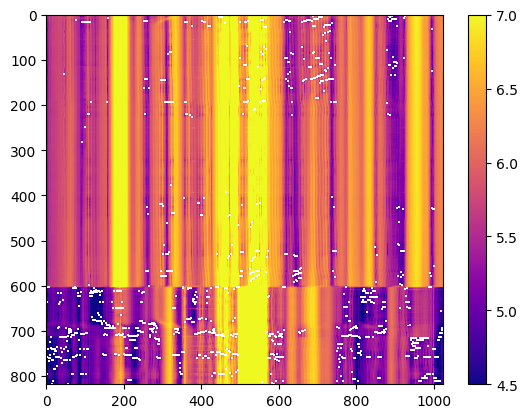

/tmp/ipykernel_83636/2372049570.py:10: RuntimeWarning: divide by zero encountered in log10
  plt.imshow(np.log10(np.abs(dauto_stack["5"]-np.min(np.abs(dauto_stack["5"]), axis=0))), aspect="auto", cmap="plasma", vmin=VMIN, vmax=VMAX)


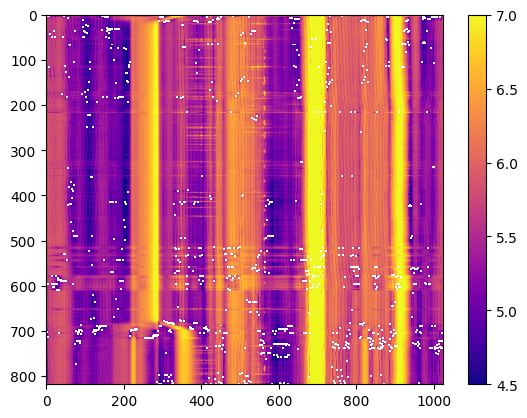

In [12]:
VMIN = 4.5
VMAX = 7

plt.figure()
plt.imshow(np.log10(np.abs(dauto_stack["3"]-np.min(np.abs(dauto_stack["3"]), axis=0))), aspect="auto", cmap="plasma", vmin=VMIN, vmax=VMAX)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(np.log10(np.abs(dauto_stack["5"]-np.min(np.abs(dauto_stack["5"]), axis=0))), aspect="auto", cmap="plasma", vmin=VMIN, vmax=VMAX)
plt.colorbar()
plt.show()

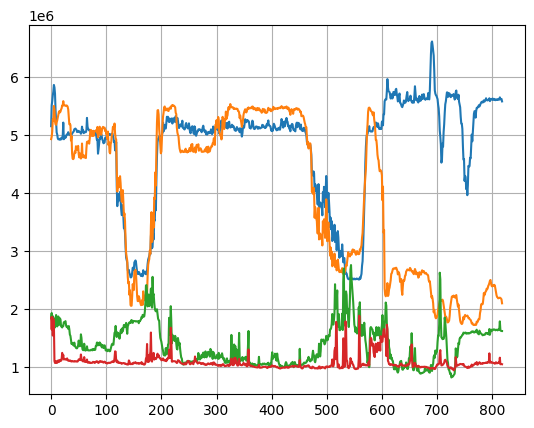

In [83]:
chan = 600
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True)
plt.sca(axs)
plt.plot(dauto_stack["2"][:, chan])
plt.plot(dauto_stack["3"][:, chan])
plt.plot(dauto_stack["4"][:, chan])
plt.plot(dauto_stack["5"][:, chan])
#plt.xlim(500, 700)
plt.grid()
plt.show()

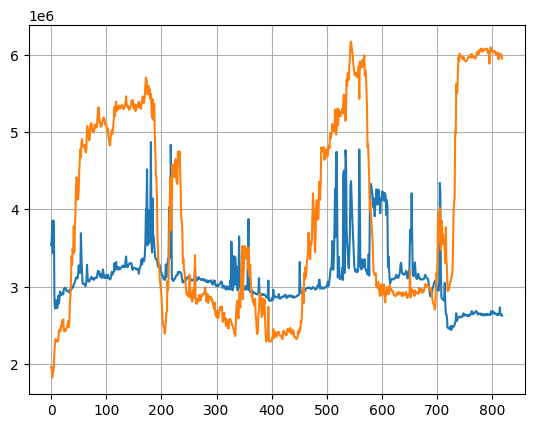

In [85]:
chan = 500
fig, axs = plt.subplots(nrows=1, sharex=True, sharey=True)
plt.sca(axs)
# plt.plot(dauto_stack["2"][:, chan])
# plt.plot(dauto_stack["3"][:, chan])
plt.plot(dauto_stack["4"][:, chan])
plt.plot(dauto_stack["5"][:, chan])
#plt.xlim(500, 700)
plt.grid()
plt.show()

## Cross

In [42]:
mag = {}
phase = {}
for k, v in dcross_stack.items():
    re = v[..., 0]
    im = v[..., 0]
    mag[k] = np.sqrt(re**2 + im**2)
    
    re -= re[:600].mean(axis=0, keepdims=True)
    im -= im[:600].mean(axis=0, keepdims=True)
    phase[k] = np.arctan2(im, re)

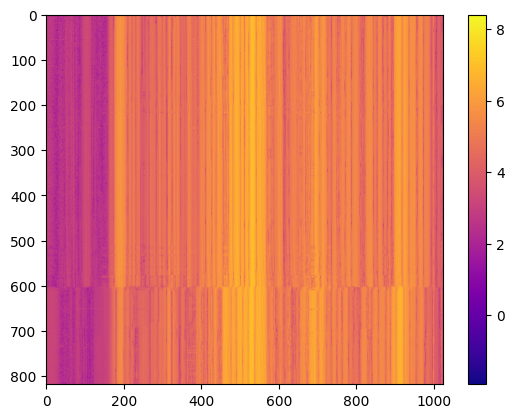

In [43]:
plt.figure()
plt.imshow(np.log10(mag["35"]), aspect="auto", cmap="plasma")
plt.colorbar()
plt.show()

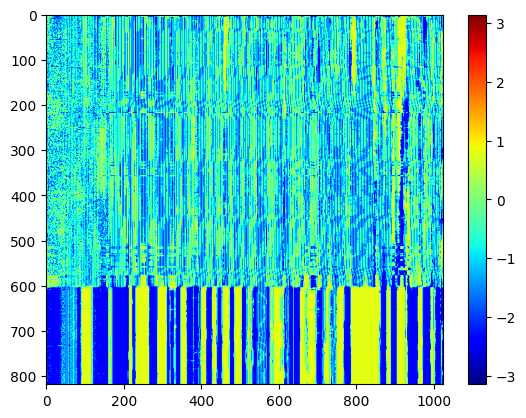

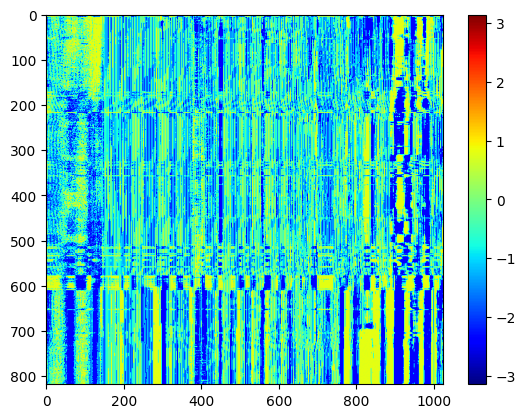

In [45]:
plt.figure()
plt.imshow(phase["35"], aspect="auto", cmap="jet", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()

plt.figure()
plt.imshow(phase["24"], aspect="auto", cmap="jet", vmin=-np.pi, vmax=np.pi)
plt.colorbar()
plt.show()

In [46]:
dcross_stack["35"].shape

(819, 1024, 2)

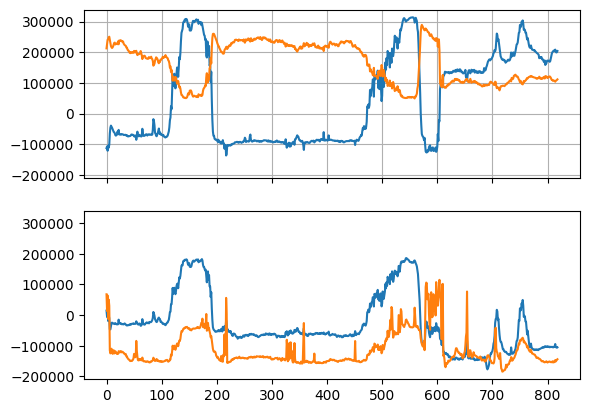

In [58]:
chan = 600
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.sca(axs[0])
plt.plot(dcross_stack["35"][:, chan, 0])
plt.plot(dcross_stack["35"][:, chan, 1])
#plt.xlim(500, 700)
plt.grid()

plt.sca(axs[1])
plt.plot(dcross_stack["24"][:, chan, 0])
plt.plot(dcross_stack["24"][:, chan, 1])
plt.show()

In [65]:
files[60]

'/home/christian/Documents/research/eigsep/eigsep_corr/eigsep_corr/data/20231014_191006.eig'

In [59]:
h = io.read_file(files[0])[0]
datetime.fromtimestamp(h["times"][0])

datetime.datetime(2023, 10, 14, 17, 18, 57, 689396)

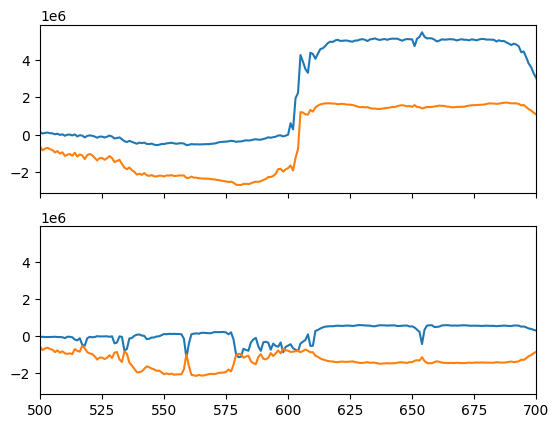

In [54]:
chan = 500
fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True)
plt.sca(axs[0])
plt.plot(dcross_stack["35"][:, chan, 0])
plt.plot(dcross_stack["35"][:, chan, 1])
plt.xlim(500, 700)


plt.sca(axs[1])
plt.plot(dcross_stack["24"][:, chan, 0])
plt.plot(dcross_stack["24"][:, chan, 1])
plt.show()